In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi
from qiskit.extensions import Initialize

# (a)

### Alice sends to Bob a qubit with the state of the coordinates of Taiwan.

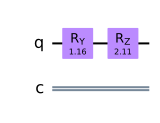

In [2]:
qc = QuantumCircuit(1, 1)

qc.ry(pi/180*(90 - 23.46999), 0)
qc.rz(pi/180*120.95726, 0)

qc.draw()

[0.41200769-0.7275878j  0.27027838+0.47729996j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


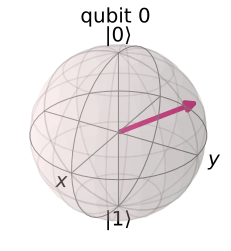

In [3]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

In [4]:
init_gate = Initialize(statevector)
init_gate.label = "init"

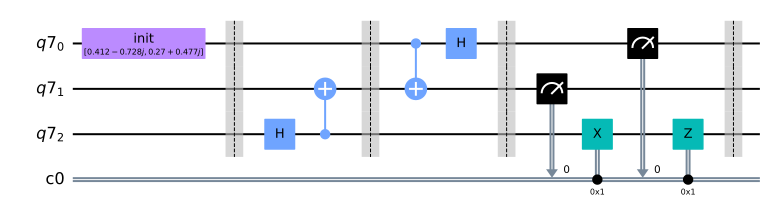

In [5]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.append(init_gate, [0])

qc.barrier()

qc.h(2)
qc.cx(2, 1)

qc.barrier()

qc.cx(0, 1)
qc.h(0)

qc.barrier()

qc.measure(1, 0)
qc.x(2).c_if(c, 1)
qc.measure(0, 0)
qc.z(2).c_if(c, 1)

qc.barrier()

qc.draw()

[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.41200769-0.7275878j  -0.        +0.j         -0.        +0.j
 -0.        +0.j          0.27027838+0.47729996j]


/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


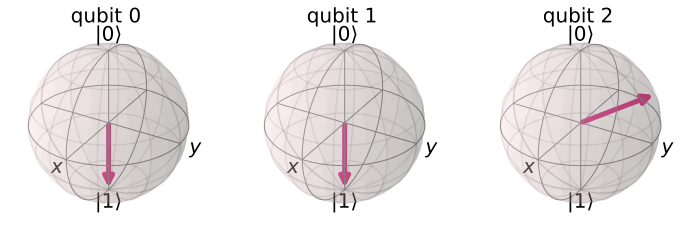

In [6]:
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)
plot_bloch_multivector(statevector)

### The inner product is calculated as
$
\langle \psi |_B |\psi \text{'} \rangle_B \\
=
\begin{bmatrix}
0.41200769-0.7275878j & 0.27027838+0.47729996j
\end{bmatrix}^{\dagger}
\begin{bmatrix}
0.41200769-0.7275878j & 0.27027838+0.47729996j
\end{bmatrix} \\
=
\begin{bmatrix}
0.41200769+0.7275878j \\
0.27027838-0.47729996j
\end{bmatrix}
\begin{bmatrix}
0.41200769-0.7275878j & 0.27027838+0.47729996j
\end{bmatrix} \\
= 0.9999999978394021 + 0j \\
\approx 1
$

### By calculating the inner product, it's the same state!

In [7]:
inverse_init_gate = init_gate.gates_to_uncompute()

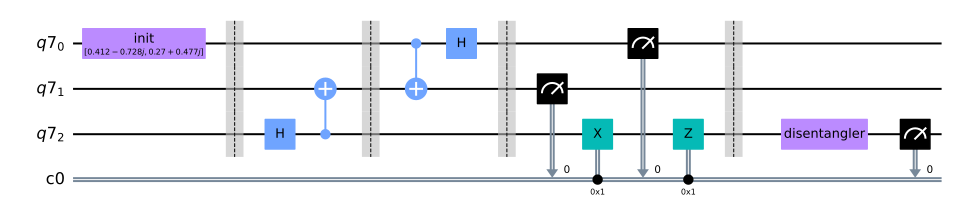

In [8]:
qc.append(inverse_init_gate, [2])

qc.measure(2, 0)

qc.draw()

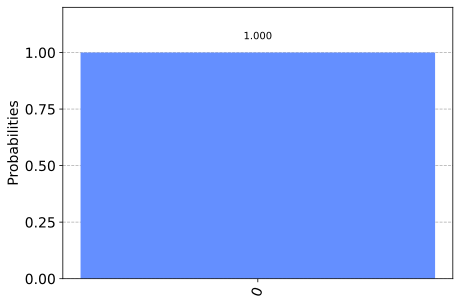

In [9]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### By the inverse test, it's the same!

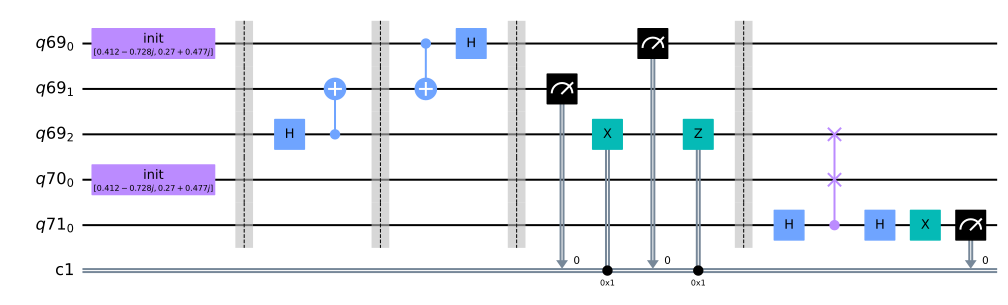

In [10]:
q = QuantumRegister(3)
q2 = QuantumRegister(1)
q3 = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c, q2, q3)

qc.append(init_gate, [0])
qc.append(init_gate, [3])

qc.barrier()

qc.h(2)
qc.cx(2, 1)

qc.barrier()

qc.cx(0, 1)
qc.h(0)

qc.barrier()

qc.measure(1, 0)
qc.x(2).c_if(c, 1)
qc.measure(0, 0)
qc.z(2).c_if(c, 1)

qc.barrier()

qc.h(4)
qc.cswap(4, 2, 3)
qc.h(4)
qc.x(4)
qc.measure(4, 0)

qc.draw()

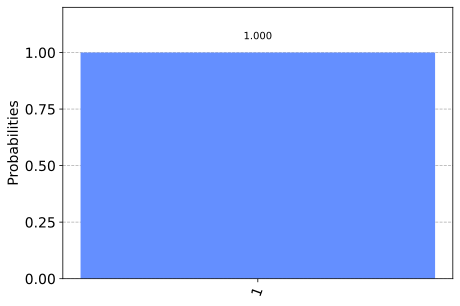

In [11]:
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### By the swap test, it's the same state!